In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)

# Generate random data for the hospital dataset
data = {
    'PatientID': np.arange(1, 151),
    'Age': np.random.randint(1, 100, size=150),
    'Gender': np.random.choice(['Male', 'Female'], size=150),
    'AdmissionDate': pd.date_range(start='2023-01-01', periods=150, freq='D').strftime('%Y-%m-%d'),
    'DischargeDate': pd.date_range(start='2023-01-03', periods=150, freq='D').strftime('%Y-%m-%d'),
    'Diagnosis': np.random.choice(['Flu', 'Covid-19', 'Injury', 'Heart Disease', 'Diabetes'], size=150),
    'TreatmentCost': np.random.uniform(100, 10000, size=150).round(2)
}

# Create DataFrame
hospital_df = pd.DataFrame(data)

hospital_df.head(150)


,PatientID,Age,Gender,AdmissionDate,DischargeDate,Diagnosis,TreatmentCost
0,1,52,Male,2023-01-01,2023-01-03,Covid-19,6266.62
1,2,93,Male,2023-01-02,2023-01-04,Injury,944.94
2,3,15,Female,2023-01-03,2023-01-05,Injury,611.65
3,4,72,Female,2023-01-04,2023-01-06,Heart Disease,5360.41
4,5,61,Female,2023-01-05,2023-01-07,Heart Disease,5452.29
...,...,...,...,...,...,...,...
145,146,5,Female,2023-05-26,2023-05-28,Flu,3769.36
146,147,90,Female,2023-05-27,2023-05-29,Diabetes,8146.72
147,148,14,Male,2023-05-28,2023-05-30,Heart Disease,9477.76
148,149,27,Female,2023-05-29,2023-05-31,Heart Disease,9861.41


In [6]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    

In [7]:

# Detect outliers in Age and TreatmentCost
age_outliers = detect_outliers(hospital_df, 'Age')
treatment_cost_outliers = detect_outliers(hospital_df, 'TreatmentCost')

age_outliers, treatment_cost_outliers

(Empty DataFrame
 Columns: [PatientID, Age, Gender, AdmissionDate, DischargeDate, Diagnosis, TreatmentCost]
 Index: [],
 Empty DataFrame
 Columns: [PatientID, Age, Gender, AdmissionDate, DischargeDate, Diagnosis, TreatmentCost]
 Index: [])

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


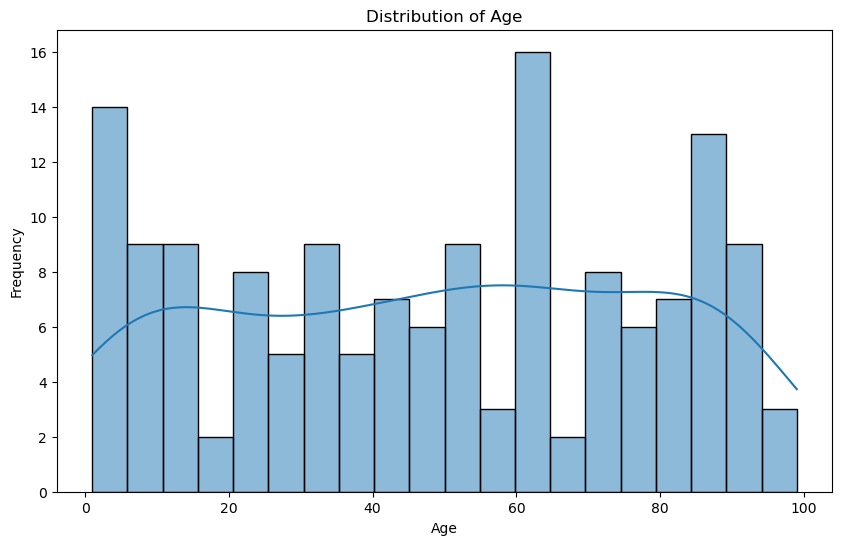

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(hospital_df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


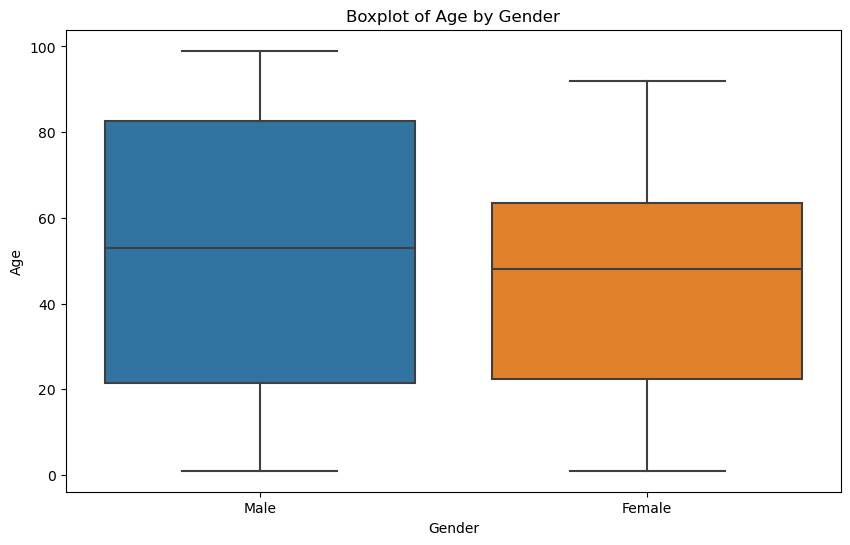

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=hospital_df)
plt.title('Boxplot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


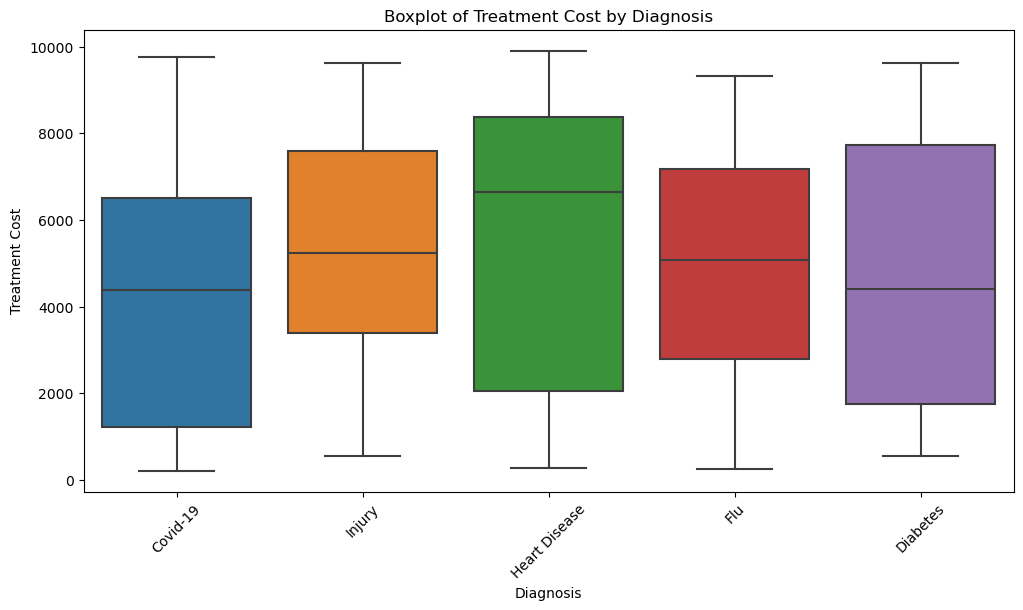

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diagnosis', y='TreatmentCost', data=hospital_df)
plt.title('Boxplot of Treatment Cost by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Treatment Cost')
plt.xticks(rotation=45)
plt.show()


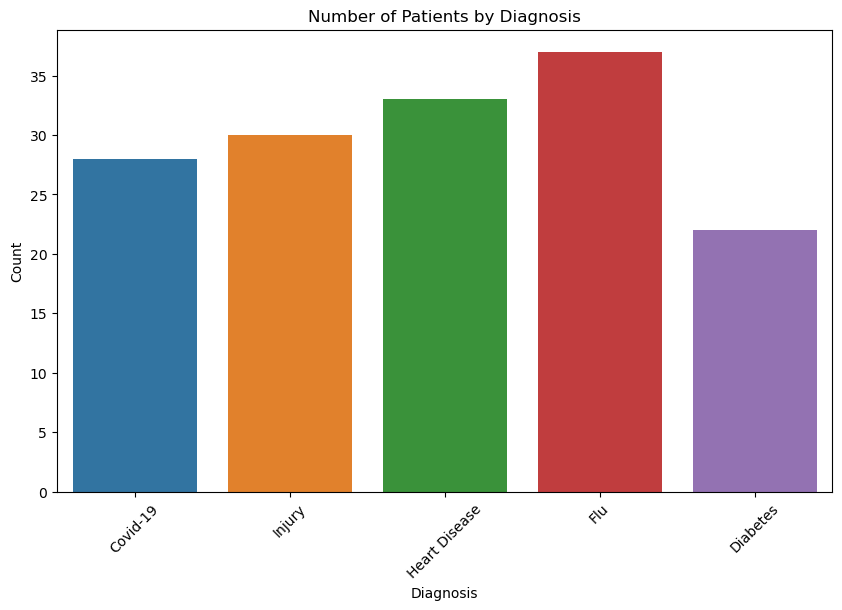

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=hospital_df)
plt.title('Number of Patients by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


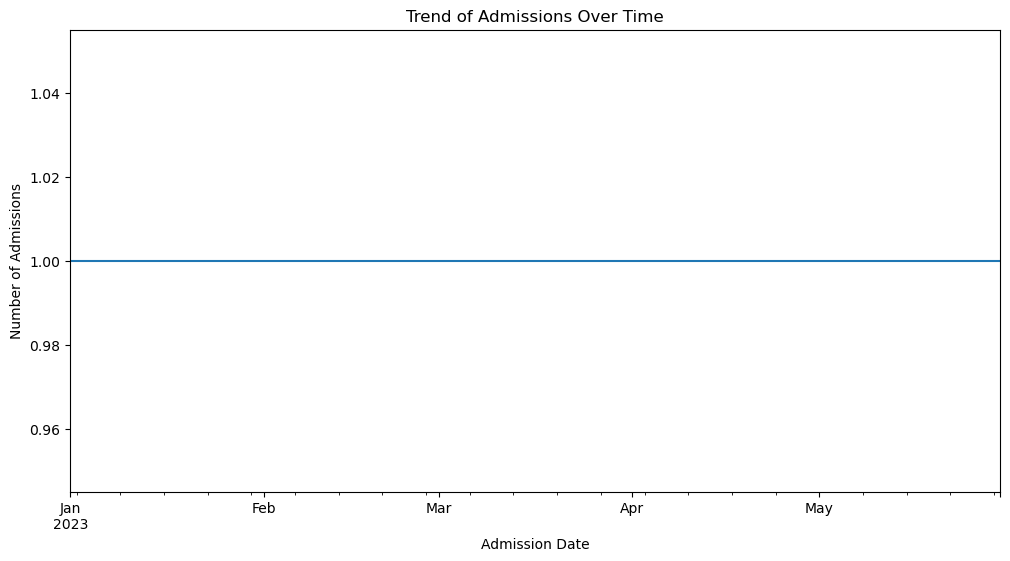

In [13]:
hospital_df['AdmissionDate'] = pd.to_datetime(hospital_df['AdmissionDate'])
admissions_trend = hospital_df.groupby('AdmissionDate').size()

plt.figure(figsize=(12, 6))
admissions_trend.plot()
plt.title('Trend of Admissions Over Time')
plt.xlabel('Admission Date')
plt.ylabel('Number of Admissions')
plt.show()


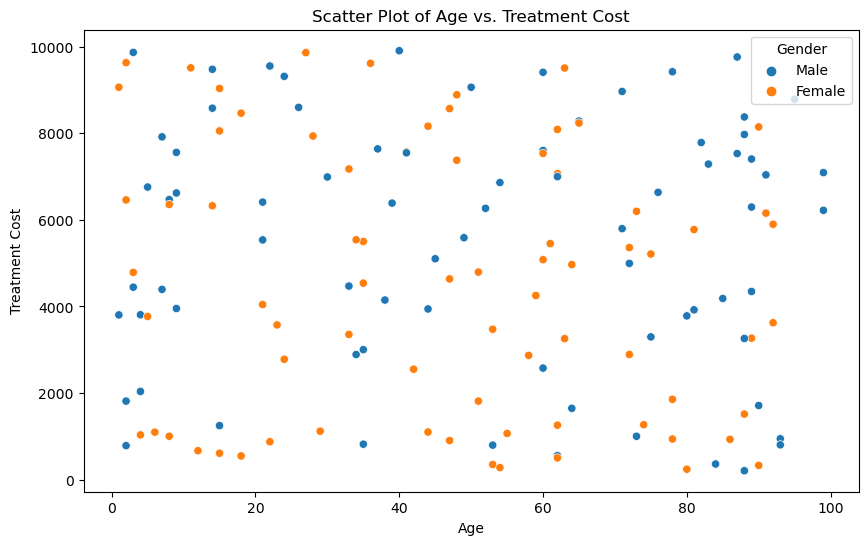

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TreatmentCost', hue='Gender', data=hospital_df)
plt.title('Scatter Plot of Age vs. Treatment Cost')
plt.xlabel('Age')
plt.ylabel('Treatment Cost')
plt.legend(title='Gender')
plt.show()


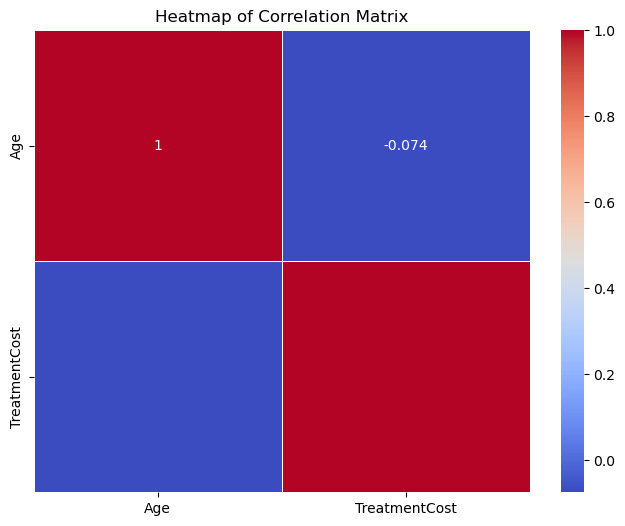

In [15]:
plt.figure(figsize=(8, 6))
correlation_matrix = hospital_df[['Age', 'TreatmentCost']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()



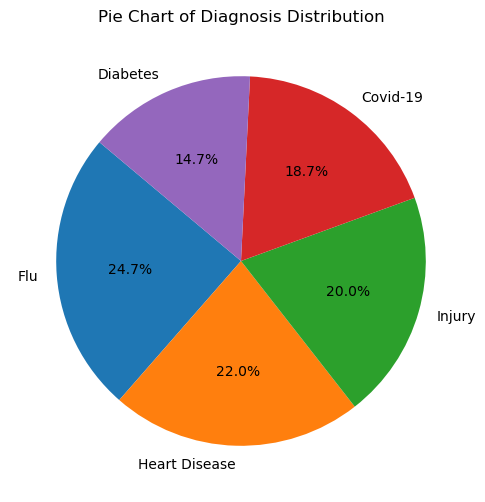

In [16]:
plt.figure(figsize=(10, 6))
diagnosis_counts = hospital_df['Diagnosis'].value_counts()
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Diagnosis Distribution')
plt.show()


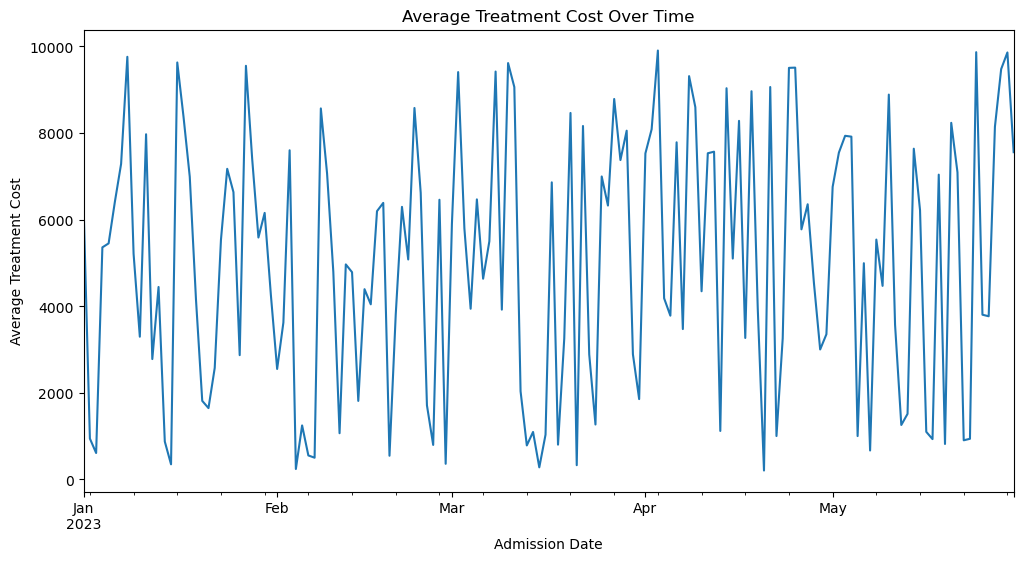

In [17]:
hospital_df['AdmissionDate'] = pd.to_datetime(hospital_df['AdmissionDate'])
average_treatment_cost = hospital_df.groupby('AdmissionDate')['TreatmentCost'].mean()

plt.figure(figsize=(12, 6))
average_treatment_cost.plot()
plt.title('Average Treatment Cost Over Time')
plt.xlabel('Admission Date')
plt.ylabel('Average Treatment Cost')
plt.show()


C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


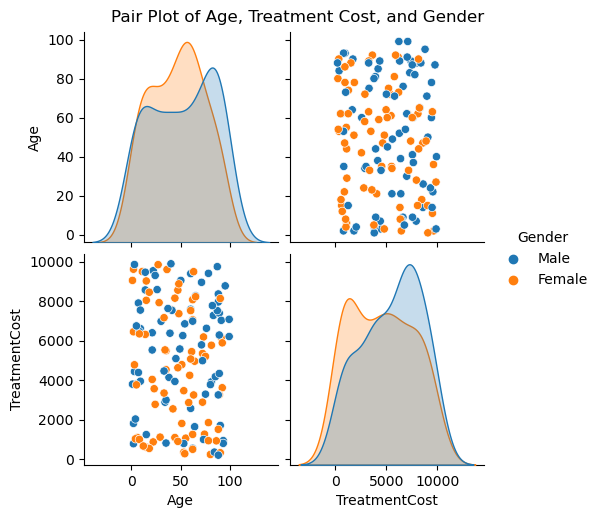

In [19]:
sns.pairplot(hospital_df[['Age', 'TreatmentCost', 'Gender']], hue='Gender')
plt.suptitle('Pair Plot of Age, Treatment Cost, and Gender', y=1.02)
plt.show()



In [22]:
pip install pandas numpy plotly dash seaborn

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.5 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.2/7.5 MB 2.5 MB/s eta 0:00:03
   - -------------------------------------- 0.3/7.5 MB 2.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.5 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/7.5 MB 2.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.5 MB 2.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/7.5 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.5 MB 3.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.2/7.5 MB 3.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/7.5 MB 3.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.5 MB 3.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.5 MB 3.1 MB/s eta 0:00:02
   --------- ------

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from dash import Dash, dcc, html

# Random data generate karna
np.random.seed(42)
data = {
    'PatientID': np.arange(1, 151),
    'Age': np.random.randint(1, 100, size=150),
    'Gender': np.random.choice(['Male', 'Female'], size=150),
    'AdmissionDate': pd.date_range(start='2023-01-01', periods=150, freq='D'),
    'Diagnosis': np.random.choice(['Flu', 'Covid-19', 'Injury', 'Heart Disease', 'Diabetes'], size=150),
    'TreatmentCost': np.random.uniform(100, 10000, size=150).round(2)
}
hospital_df = pd.DataFrame(data)

# Visualizations banana

# Age distribution
fig_age_dist = px.histogram(hospital_df, x='Age', nbins=20, title='Age Distribution')

# Treatment cost distribution
fig_cost_dist = px.histogram(hospital_df, x='TreatmentCost', nbins=20, title='Treatment Cost Distribution')

# Boxplot age by gender
fig_age_gender = px.box(hospital_df, x='Gender', y='Age', title='Age by Gender')

# Patients by diagnosis
fig_diagnosis = px.histogram(hospital_df, x='Diagnosis', title='Patients by Diagnosis')

# Admissions trend over time
hospital_df['AdmissionDate'] = pd.to_datetime(hospital_df['AdmissionDate'])
admissions_trend = hospital_df.groupby('AdmissionDate').size().reset_index(name='Admissions')
fig_admissions = px.line(admissions_trend, x='AdmissionDate', y='Admissions', title='Admissions Trend')

# Scatter plot of age vs treatment cost
fig_age_cost = px.scatter(hospital_df, x='Age', y='TreatmentCost', color='Gender', title='Age vs Treatment Cost')

# Dashboard app banana
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Hospital Data Dashboard"),
    dcc.Tabs([
        dcc.Tab(label='Age Distribution', children=[dcc.Graph(figure=fig_age_dist)]),
        dcc.Tab(label='Treatment Cost Distribution', children=[dcc.Graph(figure=fig_cost_dist)]),
        dcc.Tab(label='Age by Gender', children=[dcc.Graph(figure=fig_age_gender)]),
        dcc.Tab(label='Patients by Diagnosis', children=[dcc.Graph(figure=fig_diagnosis)]),
        dcc.Tab(label='Admissions Trend', children=[dcc.Graph(figure=fig_admissions)]),
        dcc.Tab(label='Age vs Treatment Cost', children=[dcc.Graph(figure=fig_age_cost)]),
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\Prince\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

